In [34]:
# Standard library imports
import random

# Dependencies
import nfft
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, interpolate
from scipy.signal.windows import dpss
from astropy import units as u
from astropy.timeseries.periodograms import LombScargle

from multitaper.mtls import dpss_interp, mtls_spec
from multitaper.nftest import ndft, ftest

In [35]:
# Create an evenly spaced sinusoidal signal with random noise
t = np.arange(500)
# Time is from -1/2 to 1/2
t_ = np.interp(t, (t.min(), t.max()), (-0.5, 0.5))

sig = 50*np.sin(20*2*np.pi*t_) + 30*np.sin(22*2*np.pi*t_) +\
      40*np.sin(25*2*np.pi*t_)+ 6*np.random.randn(t_.shape[0])

Text(0, 0.5, 'Signal')

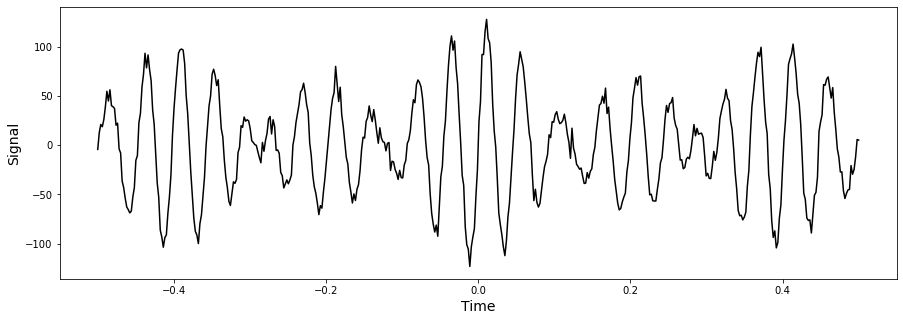

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(t_, sig, color='black')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Signal', fontsize=14)

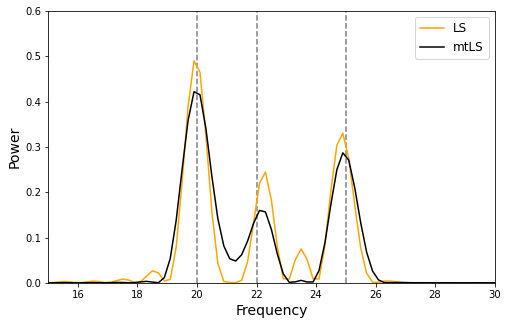

In [37]:
# Apply LS and MTLS (NW=1, K=1), and compare
freq, spec = LombScargle(t_, sig).autopower(method='fast', nyquist_factor=1)
freqMT, specMT = mtls_spec(t_, sig, center_data=True, NW=1, K=1, adaptive_weighting=False)

plt.figure(figsize=(8, 5))
plt.plot(freq, spec, color='orange', label='LS')
plt.plot(freqMT, specMT, color='black', label='mtLS')
plt.vlines([20, 22, 25], 0, 0.6, linestyle='--', color='grey')
plt.xlim([15, 30])
plt.ylim([0, 0.6])
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.legend(fontsize=12)

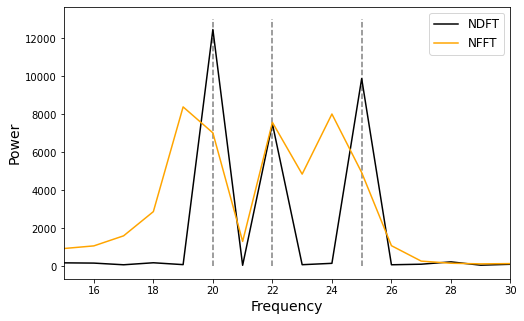

In [48]:
# Apply NDFT and NFFT to the evenly sampled timeseries and compare
# Total length of time-series
N = len(t_)
# Frequencies
k = -(N // 2) + np.arange(N)

plt.figure(figsize=(8, 5))
plt.plot(k, np.abs(ndft(t_, sig)), color='black', label='NDFT')
plt.plot(k, np.abs(nfft.nfft(t_, sig)), color='orange', label='NFFT')
plt.vlines([20, 22, 25], 0, 13000, linestyle='--', color='grey')
plt.xlim([15, 30])
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.legend(fontsize=12)

In [39]:
# Apply F-test to the signal
freq, f_test = ftest(t_, sig, center_data=True, method='dft')

Text(0, 0.5, 'Power')

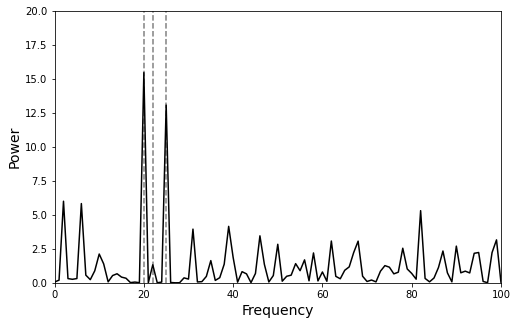

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(freq, f_test, color='black')
plt.vlines([20, 22, 25], 0, 20, linestyle='--', color='grey')
plt.xlim([0, 100])
plt.ylim([0, 20])
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Power', fontsize=14)

In [56]:
# Apply F-test to the signal
freq, f_test = ftest(t_, sig, center_data=True, method='fft')

Text(0, 0.5, 'Power')

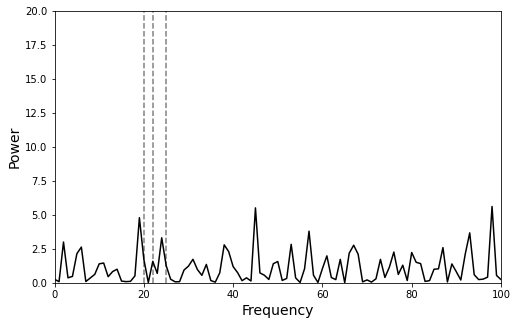

In [57]:
plt.figure(figsize=(8, 5))
plt.plot(freq, f_test, color='black')
plt.vlines([20, 22, 25], 0, 20, linestyle='--', color='grey')
plt.xlim([0, 100])
plt.ylim([0, 20])
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Power', fontsize=14)

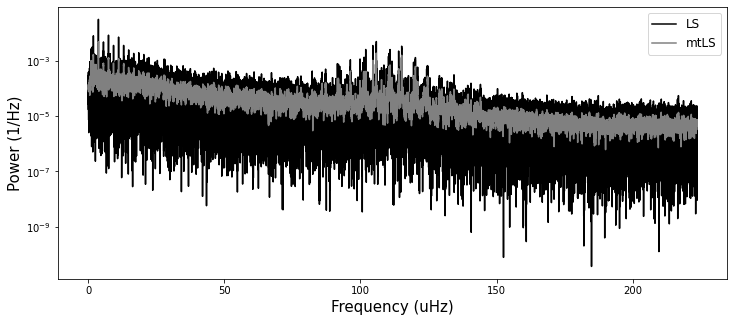

In [60]:
kepler_rgb = np.loadtxt('/Users/aaryapatil/Desktop/research/Asteroseismology/data/koi2133.lp.ts')

freq, spec = LombScargle(kepler_rgb[:, 0]*u.day, kepler_rgb[:, 1]).autopower(method='fast', nyquist_factor=1)
freqMT, specMT = LSspecMT(kepler_rgb[:, 0]*u.day, kepler_rgb[:, 1], center_data=True, NW=4, K=7, adaptive_weighting=False)

plt.figure(figsize=(12, 5))
plt.plot(freq.to_value(u.uHz), spec, color='black', label='LS')
plt.plot(freqMT.to_value(u.uHz), specMT.to_value(1/u.Hz), color='grey', label='mtLS')
plt.yscale('log')
plt.xlabel('Frequency (uHz)', fontsize=15)
plt.ylabel('Power (1/Hz)', fontsize=15)
plt.legend(fontsize=12)

450 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


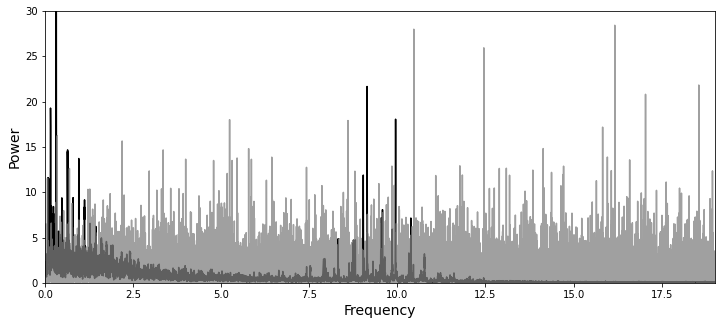

In [65]:
%timeit freq, f_test = ftest(kepler_rgb[:, 0], kepler_rgb[:, 1], center_data=True, method='fft')

plt.figure(figsize=(12, 5))
plt.plot(freqMT.to_value(1/u.day), 10**9*specMT.to_value(u.day), color='black', label='mtLS')
plt.plot(freq, f_test, alpha=0.75, color='grey')
plt.xlim([0, 19])
plt.ylim([0, 30])
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.show()

In [ ]:
%timeit freq, f_test = ftest(kepler_rgb[:, 0], kepler_rgb[:, 1], center_data=True, method='dft')

plt.figure(figsize=(12, 5))
plt.plot(freqMT.to_value(1/u.day), 10**9*specMT.to_value(u.day), color='black', label='mtLS')
plt.plot(freq, f_test, alpha=0.75, color='grey')
plt.xlim([0, 19])
plt.ylim([0, 30])
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.show()